In [82]:

import numpy as np
import pytorch_lightning as pl
import torch
import pacmap
import hdbscan
from sklearn.cluster import DBSCAN
import seaborn as sns
from unsupervised_meta_learning.re_rank import re_ranking
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
z = torch.load('./data/z.pt')
labels = torch.load('./data/labels.pt')

In [32]:
z.requires_grad = False

In [33]:
z.squeeze_(0)
labels.squeeze_(0)
z.shape, labels.shape

(torch.Size([800, 1600]), torch.Size([800]))

In [34]:
z_reduced = pacmap.PaCMAP(n_neighbors=50).fit_transform(z.numpy())

<AxesSubplot:>

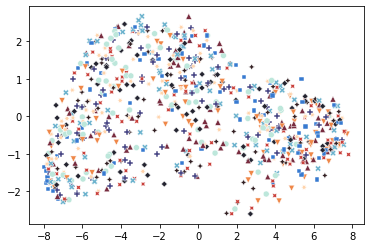

In [35]:
sns.scatterplot(x=z_reduced[:, 0], y=z_reduced[:, 1], hue=labels, style=labels, palette="icefire", legend=False)

In [151]:
dists = re_ranking(z, z, lambda_value=.5)

Computing source distance...
tensor(0.0020)
Computing original distance...


TypeError: transpose() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)


In [129]:
all_num_source  = z.shape[0]
sour_tar_dist = np.power(
    torch.cdist(z, z), 2)

In [131]:
sour_tar_dist = 1-np.exp(-sour_tar_dist)

In [132]:
sour_tar_dist

tensor([[0.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.0000e+00, 2.4414e-04, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        ...,
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         2.4414e-04]])

In [137]:
source_dist_vec = torch.min(sour_tar_dist, axis = 1)[0]

In [138]:
source_dist_vec = source_dist_vec / torch.max(source_dist_vec)

In [144]:
source_dist = np.zeros([all_num, all_num])


NameError: name 'all_num' is not defined

In [83]:
tri_mat = np.triu(dists, 1) # tri_mat.dim=2
tri_mat = tri_mat[np.nonzero(tri_mat)] # tri_mat.dim=1
tri_mat = np.sort(tri_mat,axis=None)
top_num = np.round(0.6*tri_mat.size).astype(int)

In [87]:
eps = tri_mat[:top_num].mean()
eps

1.4787757755768116

In [117]:
preds = hdbscan.HDBSCAN(cluster_selection_epsilon=1.2, metric='precomputed', n_jobs=6, min_cluster_size=3).fit_predict(dists)

In [118]:
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([363,  41,  39,   3,   5,   4,   5,   4,   3,  10,   5,   4,   3,
          3,   3,   6,   3,  25,   3,   4,   3,   3,   4,   6,   3,   3,
          3,   4,   3,   4,  11,   6,   9,  18,  12,  18,   3,   3,   6,
          6,   7,  11,  11, 107]))

<AxesSubplot:>

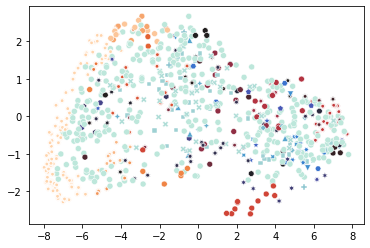

In [119]:
sns.scatterplot(x=z_reduced[:, 0], y=z_reduced[:, 1], hue=preds, style=preds, palette="icefire", legend=False)

In [73]:
labels.unique(return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([80, 80, 80, 80, 80, 80, 80, 80, 80, 80]))